## **Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

#### Approach 1

In [68]:
#Import Libraries
import pandas as pd

In [69]:
# Import data from local system
file_path = r'C:\NumpyNinja\ML classes -Project\ML Assignments\adult\adult.data'

df = pd.read_csv(file_path, delimiter=",", names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### **The number of rows here are 32561 and it is not matching with the number of instances given in dataset link. We decided to move forward with approach 2**

#### Approach 2

In [2]:
#Installing ucimlrepo package
!pip install ucimlrepo

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo, list_available_datasets


from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics


def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

In [4]:
#List of UCI repositories with ID
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [5]:
# Fetch the 'adult' dataset from UCI repository where id for dataset is 2
adultDataset = fetch_ucirepo(id=2)

In [6]:
#Creating dataframe by joining features and target
Xdata = pd.DataFrame(adultDataset.data.features)
Ydata = pd.DataFrame(adultDataset.data.targets, columns=['income'])
adultDataFrame = pd.concat([Xdata,Ydata], axis = 1)
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
# Displaying first 10 rows of dataset
adultDataFrame.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
# Displaying 5 rows using sample function
adultDataFrame.sample(n=5,random_state = 42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K


In [9]:
# Examining columns using info
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
# Checking for missing values using isnull
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
# Summary statistics for numerical columns using describe 
adultDataFrame.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# For checking summary statistics for categorical columns
adultDataFrame.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


**Data Cleaning:
Handle missing values by either removing rows or filling them with appropriate values (mean, median, mode, etc.). Correct data types if needed. Address any outliers or anomalies**

In [13]:
#checking for null values in the columns
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [15]:
(adultDataFrame == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
adult_df_cleaned = adultDataFrame.replace('?', np.nan)
adult_df_cleaned.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [17]:
row_withnullval = adult_df_cleaned[adult_df_cleaned['workclass'].isnull()]
row_withnullval.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [18]:
adult_df_cleaned['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [19]:
adult_df_cleaned['income'].replace('<=50K.', '<=50K',inplace = True)
adult_df_cleaned['income'].replace('>50K.', '>50K',inplace = True)
adult_df_cleaned['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [20]:
#filling the missing values for workclass column

#identify missing values in workclass column
test_data = adult_df_cleaned[(adult_df_cleaned['workclass'].isnull())].copy()
test_label = test_data.workclass

train_data = adult_df_cleaned[(adult_df_cleaned['workclass'].notnull())].copy()
train_label = train_data.workclass

#remove the workclass column from train data and test data
test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'workclass'
majority_class = adult_df_cleaned.workclass.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['workclass'].isnull()
adult_df_cleaned.loc[mask, 'workclass'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.workclass.value_counts())
print(adult_df_cleaned.workclass.unique())

workclass
Private             36677
Self-emp-not-inc     3870
Local-gov            3147
State-gov            1983
Self-emp-inc         1696
Federal-gov          1432
Without-pay            21
Never-worked           16
Name: count, dtype: int64
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']


In [21]:
#filling the missing values for occupation column

#identify missing values in occupation column
test_data = adult_df_cleaned[(adult_df_cleaned['occupation'].isnull())].copy()
test_label = test_data.occupation

train_data = adult_df_cleaned[(adult_df_cleaned['occupation'].notnull())].copy()
train_label = train_data.occupation

#remove the occupation column from train data and test data
test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned.occupation.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['occupation'].isnull()
adult_df_cleaned.loc[mask, 'occupation'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.occupation.value_counts())
print(adult_df_cleaned.occupation.unique())

occupation
Prof-specialty       7658
Craft-repair         6559
Exec-managerial      6136
Adm-clerical         5793
Sales                5660
Other-service        5207
Machine-op-inspct    3084
Transport-moving     2394
Handlers-cleaners    2125
Farming-fishing      1505
Tech-support         1467
Protective-serv       989
Priv-house-serv       250
Armed-Forces           15
Name: count, dtype: int64
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [22]:
#filling the missing values for native-country column

#identify missing values in native-country column
test_data = adult_df_cleaned[(adult_df_cleaned['native-country'].isnull())].copy()
test_label = test_data['native-country']

train_data = adult_df_cleaned[(adult_df_cleaned['native-country'].notnull())].copy()
train_label = train_data['native-country']

#remove the native-country column from train data and test data
test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned['native-country'].value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['native-country'].isnull()
adult_df_cleaned.loc[mask, 'native-country'] = overall_pred.values

# Verify the results
print(adult_df_cleaned['native-country'].value_counts())
print(adult_df_cleaned['native-country'].unique())

native-country
United-States                 44644
Mexico                          958
Philippines                     309
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           153
Cuba                            138
England                         127
China                           126
South                           121
Jamaica                         107
Italy                           105
Dominican-Republic              105
Japan                            94
Vietnam                          89
Guatemala                        89
Poland                           87
Columbia                         85
Haiti                            75
Portugal                         68
Taiwan                           66
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

In [23]:
adultDataFrame['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [25]:
adult_df_cleaned.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


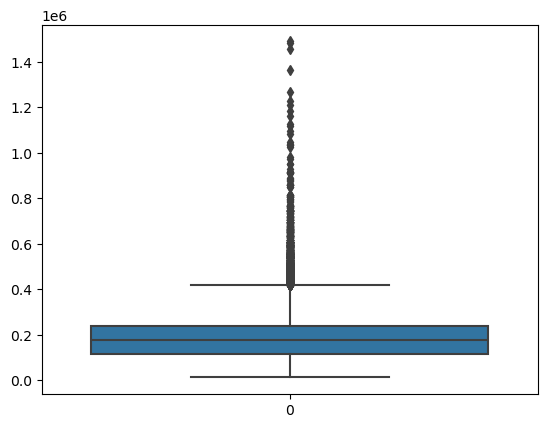

In [34]:
# Plotting to visualize
import matplotlib.pyplot as plt
import seaborn as sns

checkVisualisedf = adult_df_cleaned
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#sns.boxplot(x=checkVisualisedf['capital-gain'], ax=axes[0]).set_title('Capital gain')
sns.boxplot(data = checkVisualisedf['fnlwgt'])
plt.show()

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Use IQR method to find outliers
def find_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(str(upper_bound) + " -- " + str(lower_bound))
    return outliers

# Get outliers
outliers = find_outliers_iqr(numeric_data)
print(outliers)
# Output the number of outliers and some sample outlier values
for col, outlier_data in outliers.items():
    print(f"Outliers in '{col}': {len(outlier_data)} found.")
    print(outlier_data.head())  # Display the first few outliers for each column

78.0 -- -2.0
16.5 -- 4.5
0.0 -- 0.0
0.0 -- 0.0
52.5 -- 32.5
{'age': 74       79
222      90
430      80
918      81
1040     90
         ..
48524    80
48564    80
48667    83
48709    79
48812    81
Name: age, Length: 216, dtype: int64, 'education-num': 15       4
56       3
61       4
79       4
160      2
        ..
48638    4
48645    4
48766    4
48782    4
48791    4
Name: education-num, Length: 1794, dtype: int64, 'capital-gain': 0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
48805     5178
48812     2936
48813     7688
48822    15024
48840     5455
Name: capital-gain, Length: 4035, dtype: int64, 'capital-loss': 23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
48783    1602
48794    2057
48802    1590
48814    1669
48816    1902
Name: capital-loss, Length: 2282, dtype: int64, 'hours-per-week': 1        13
6        16
10       80
12       30
20       60
         ..
48820     8
48822    55
48825    32
48

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Calculate Z-scores
#z_scores = np.abs(stats.zscore(numeric_data))
z_scores = numeric_data.apply(zscore).abs()
print(z_scores)
# Set a threshold for what you consider an outlier (e.g., Z-score > 3)
threshold = 3

# Display the outliers
outliers_list = {}
for col in numeric_columns:
    # Identify outliers in the column
    is_outlier = z_scores[col] > threshold
    outliers_in_col = numeric_data[col][is_outlier]
    
    # Store outliers in the list
    outliers_list[col] = outliers_in_col
    
    # Print results
    num_outliers = len(outliers_in_col)
    print(f"Outliers in '{col}': {num_outliers} found.")
    # if num_outliers > 0:
    #     print(outliers_in_col.head())  # Display first few outliers for each column

            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.025996       1.136512      0.146932      0.217127        0.034087
1      0.828308       1.136512      0.144804      0.217127        2.213032
2      0.046942       0.419335      0.144804      0.217127        0.034087
3      1.047121       1.197259      0.144804      0.217127        0.034087
4      0.776316       1.136512      0.144804      0.217127        0.034087
...         ...            ...           ...           ...             ...
48837  0.025996       1.136512      0.144804      0.217127        0.356894
48838  1.849433       0.419335      0.144804      0.217127        0.034087
48839  0.046942       1.136512      0.144804      0.217127        0.772930
48840  0.390683       1.136512      0.587220      0.217127        0.034087
48841  0.265754       1.136512      0.144804      0.217127        1.579946

[48842 rows x 5 columns]
Outliers in 'age': 186 found.
Outliers in 'education-num': 330 found.
Outl